In [14]:
import modin.pandas as pd
import numpy as np
import swifter

import perfplot
import matplotlib.pyplot as plt

In [106]:
df = pd.DataFrame({
    "gaussian": np.random.normal(size=1_000_000),
    "str_date": ["2020-01-01"] * 1_000_000,
})

In [107]:
def modin_apply(df, func):
    return df.apply(func)._to_pandas()

In [108]:
def swifter_apply(df, func):
    return df.swifter.apply(func)._to_pandas()

In [126]:
def perfplot_benchmark(df, field, func):
    benchmark = perfplot.bench(
        setup=lambda n: df.iloc[:n][field],
        kernels=[
            lambda srs: modin_apply(srs, func),
            lambda srs: swifter_apply(srs, func),
        ],
        labels=["Modin Apply", "Swifter Apply"],
        n_range=[2**k for k in range (0, 26, 2)],
        xlabel="n_rows",
        equality_check=lambda left, right: left.equals(right)
    )
    return benchmark

In [127]:
bench = perfplot_benchmark(df, "str_date", pd.to_datetime)

  0%|          | 0/2 [00:00<?, ?it/s]

(pid=87398) UserWarning: The pandas version installed 1.0.1 does not match the supported pandas version in Modin 1.0.5. This may cause undesired side effects!
(pid=87399) UserWarning: The pandas version installed 1.0.1 does not match the supported pandas version in Modin 1.0.5. This may cause undesired side effects!



  0%|          | 0/2 [00:00<?, ?it/s]

(pid=87396) UserWarning: The pandas version installed 1.0.1 does not match the supported pandas version in Modin 1.0.5. This may cause undesired side effects!



  0%|          | 0/2 [00:00<?, ?it/s]

(pid=87397) UserWarning: The pandas version installed 1.0.1 does not match the supported pandas version in Modin 1.0.5. This may cause undesired side effects!
(pid=94545) UserWarning: The pandas version installed 1.0.1 does not match the supported pandas version in Modin 1.0.5. This may cause undesired side effects!



100%|██████████| 13/13 [15:07<00:00, 69.84s/it] 


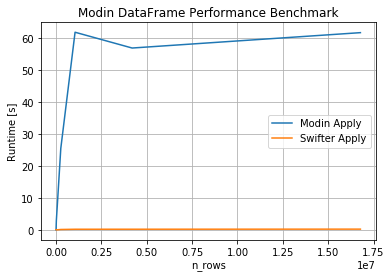

In [131]:
fig = plt.figure()
bench.xlabel = "n_rows"
bench.plot(logx=False, logy=False)
plt.title("Modin DataFrame Performance Benchmark")
plt.savefig("modin_swifter_performance_benchmark.png")

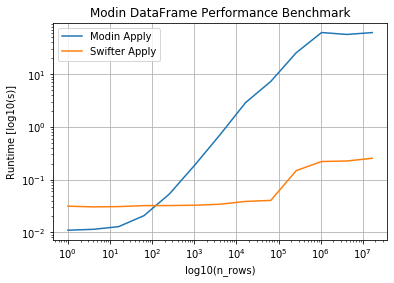

In [130]:
fig = plt.figure()
bench.xlabel = "log10(n_rows)"
bench.plot(logx=True, logy=True)
plt.title("Modin DataFrame Performance Benchmark")
plt.ylabel("Runtime [log10(s)]")
plt.savefig("modin_swifter_performance_benchmark_loglog.png")